In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Exercise 1

In [3]:
def setSeed(seed):
    global rand
    rand = seed

# i) Implementation of GGL
def ggl():
    k = 16807
    m = 2**31 - 1
    global rand
    rand = (k*rand) % m
    
    return rand

In [4]:
setSeed(120)

x = []
y = []
for i in range(5_000_000):
    x.append(ggl())
    y.append(ggl())

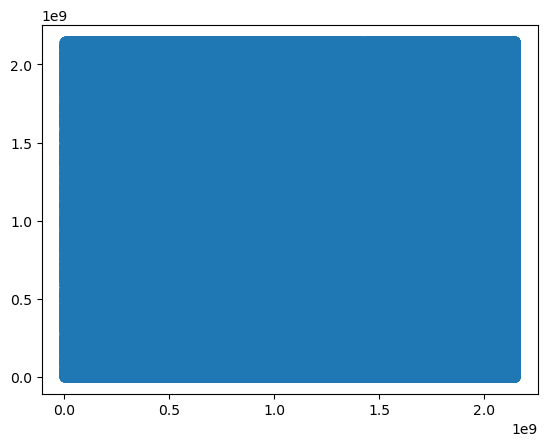

In [5]:
plt.scatter(x, y)

<function matplotlib.pyplot.show(close=None, block=None)>

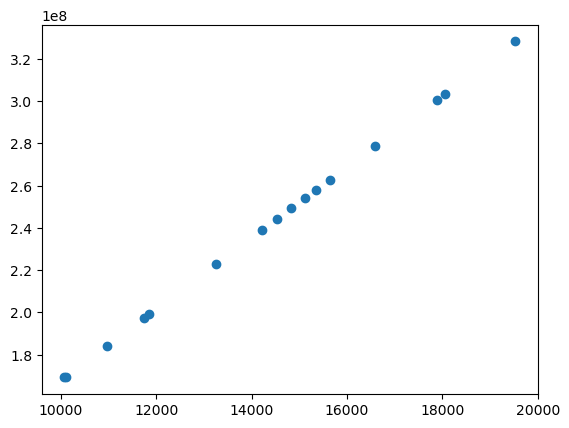

In [6]:
filtered_x = []
filtered_y = []
for i, j in zip(x,y):
    if 10_000 <= i <= 10_000 + 10_000:
        filtered_x.append(i)
        filtered_y.append(j)
        
plt.scatter(filtered_x, filtered_y)
plt.show

# When we inspect a small slice of x values on the interval [10 000, 20 000] 
# we can see that there is a linear dependence between consecutive random numbers.
# This was expected due to the way we constructed the GGL random number generator.

In [7]:
def initialPoints(seed):
    global ret
    ret = []
    setSeed(seed)
    for i in range(55):
        ret.append(ggl())
    return ret

# iii) Implementation of RAN3
def ran3():
    global ret
    m = 2**32
    i = len(ret) - 1
    new = (ret[i-55] - ret[i-24]) % m
    ret.append(new)
    return new


initialPoints(99)
for i in range(10):
    print(ran3())

956641114
3313929940
2232083023
227504504
3294790717
534225463
98228534
3807013691
203808658
175698041


In [8]:
x = []
y = []
initialPoints(99)
for i in range(5_000_000):
    x.append(ran3())
    y.append(ran3())

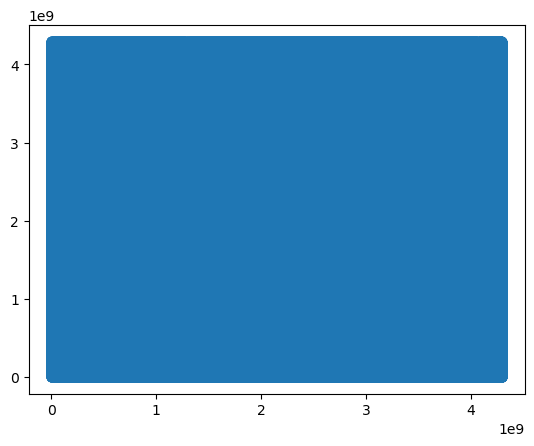

In [9]:
plt.scatter(x, y)

<function matplotlib.pyplot.show(close=None, block=None)>

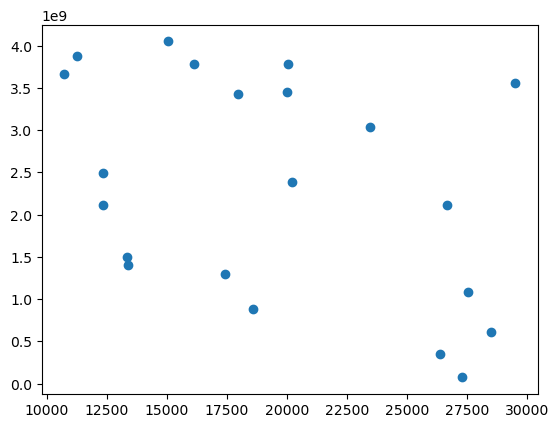

In [10]:
filtered_x = []
filtered_y = []
for i, j in zip(x,y):
    if 10_000 <= i <= 20_000 + 10_000:
        filtered_x.append(i)
        filtered_y.append(j)
        
plt.scatter(filtered_x, filtered_y)
plt.show

# When we inspect a small slice of x values on the interval [20 000, 30 000] 
# we can see that this seems much more random than it did for GGL.

In [11]:
import random

# X \sim U(0,1), GGL based "uniform" distribution on [0,1]
def uniform01_ggl():
    k = 16807
    m = 2**31 - 1
    global rand
    rand = (k*rand) % m
    return rand / m

# Y \sim U(0,1), RAN3 based uniform distribution on [0,1]
def uniform01_ran3():
    global ret
    m = 2**32
    i = len(ret) - 1
    new = (ret[i-55] - ret[i-24]) % m
    ret.append(new)
    return new / m

# Z \sim U(0,1), Python's built-in random number generator (Mersenne-Twister)
def uniform01_mt():
    return random.random()

In [12]:
x_1 = []
y_1 = []

x_2 = []
y_2 = []

x_3 = []
y_3 = []

initialPoints(99)
for i in range(5_000_000):
    x_1.append(uniform01_ggl())
    y_1.append(uniform01_ggl())
    
    x_2.append(uniform01_ran3())
    y_2.append(uniform01_ran3())
    
    x_3.append(uniform01_mt())
    y_3.append(uniform01_mt())

<function matplotlib.pyplot.show(close=None, block=None)>

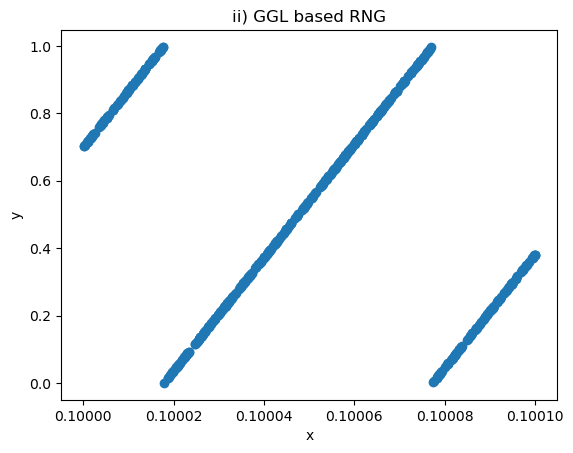

In [13]:
filtered_x_1 = []
filtered_y_1 = []
for i, j in zip(x_1, y_1):
    if 0.1 <= i <= 0.1 + 1e-4:
        filtered_x_1.append(i)
        filtered_y_1.append(j)
        
plt.scatter(filtered_x_1, filtered_y_1)
plt.title("ii) GGL based RNG")
plt.xlabel("x")
plt.ylabel("y")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

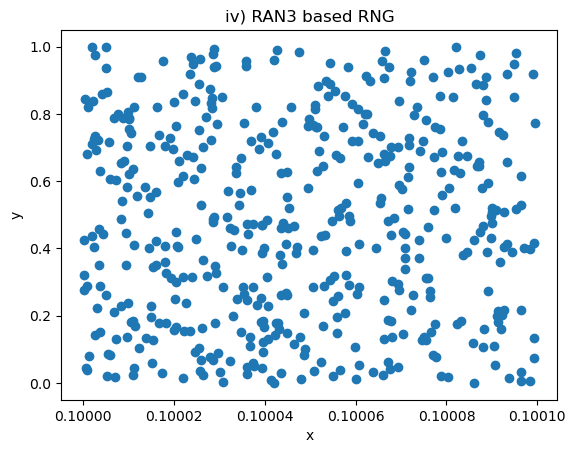

In [14]:
filtered_x_2 = []
filtered_y_2 = []
for i, j in zip(x_2, y_2):
    if 0.1 <= i <= 0.1 + 1e-4:
        filtered_x_2.append(i)
        filtered_y_2.append(j)
        
plt.scatter(filtered_x_2, filtered_y_2)
plt.title("iv) RAN3 based RNG")
plt.xlabel("x")
plt.ylabel("y")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

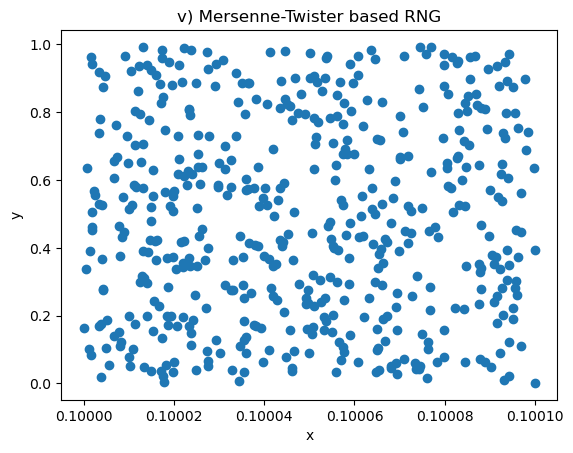

In [15]:
filtered_x_3 = []
filtered_y_3 = []
for i, j in zip(x_3, y_3):
    if 0.1 <= i <= 0.1 + 1e-4:
        filtered_x_3.append(i)
        filtered_y_3.append(j)
        
plt.scatter(filtered_x_3, filtered_y_3)
plt.title("v) Mersenne-Twister based RNG")
plt.xlabel("x")
plt.ylabel("y")
plt.show

In [16]:
# vi)

# There seems to be a clear linear dependence between consecutive random points generated by the GGL based RNG.
# This is clear from it's implementation. RAN3 performed much better and the results seems much more random on the same
# interval of width 10e-4. RAN3 performed very similarly to Pythons Mersenne-Twister RNG and got good results.

In [17]:
### Exercise 2

In [18]:
### Part a)
def optimismPessimismA():
    agents = [50] * 500_000
    for k in range(500_000):
        for i in range(100):
            if random.randint(0,1) == 0:
                agents[k] += 1
            else:
                agents[k] -= 1
    return agents

resultsA = optimismPessimismA()

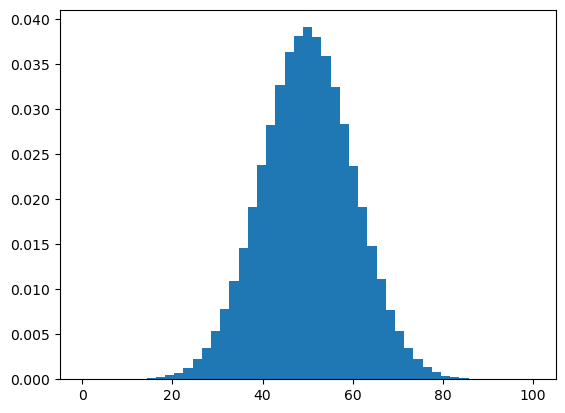

In [19]:
plt.hist(resultsA, bins=np.linspace(0,100,50), density='true')
plt.show()


# PMF = binomial distribution with n = 100, p = 0.5

# The probability density function, which this PMF approaches in the limit of infinite number of agents and of continuous
# shift of states is the NORMAL DISTRIBUTION with mu = n*p and sigma^2 = np(1-p)

In [20]:
### Part b)
def optimismPessimismB():
    agents = [50] * 500_000
    for k in range(500_000):
        for i in range(100):
            if random.randint(0,1) == 0:
                agents[k] += 10
            else:
                agents[k] -= 0.5
    return agents

resultsB = optimismPessimismB()

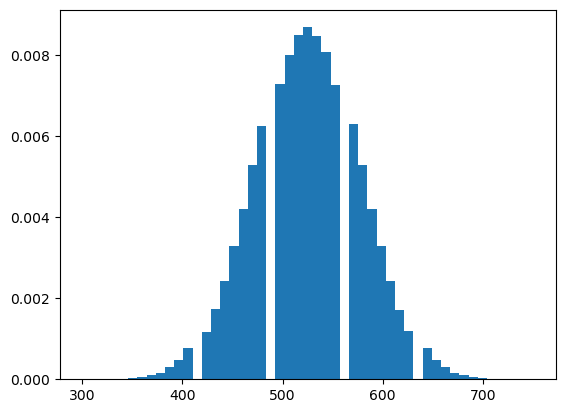

In [21]:
plt.hist(resultsB, bins=np.linspace(300,750,50), density='true')
plt.show()

# The probability mass function here is based on a BINOMIAL DISTRIBUTION.

# The probability density function, which this PMF approaches in the limit of infinite number of agents and of continuous
# shift of states is the NORMAL DISTRIBUTION

In [22]:
### Part c)

def optimismPessimismC():
    agents = [50] * 500_000
    c = 0.7
    for i in range(100):
        for k in range(500_000):
            if random.randint(0,1) == 0:
                agents[k] = agents[k] / c
            else:
                agents[k] = agents[k] * c
    return agents

resultsC = optimismPessimismC()

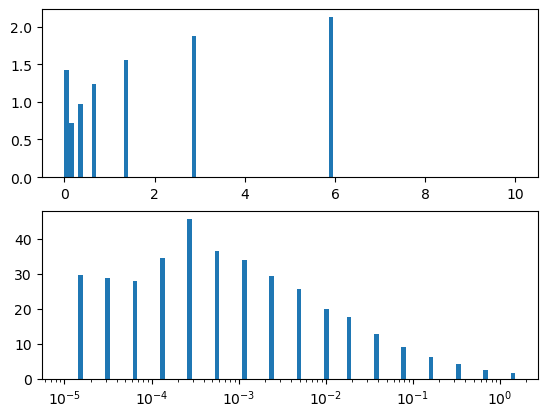

In [23]:
#fig, axs = plt.subplots(2)
#axs[0].hist(resultsC, bins=np.linspace(start=0, stop=2000, num=50), density='true')
#axs[1].hist(resultsC, bins=np.logspace(start=np.log10(1), stop=np.log10(2000), num=50), density='true')
#plt.xscale('log')
#plt.show()

# i)
plt.subplot(211)
hist, bins, _ = plt.hist(resultsC, bins=np.linspace(0,10,100), density='true')

# ii)
logbins = np.logspace(np.log10(0.00001),np.log10(1.5),100)
plt.subplot(212)
plt.hist(resultsC, bins=logbins, density='true')
plt.xscale('log')
plt.show()

# This again is based on a BINOMIAL DISTRIBUTION, which has been transformed to the form Y = c * 0.7^(f(X)), 
# where X follows a binomial distribution and f(X) is a linear function on the random variable X.

# The probability density function, which this PMF approaches in the limit of infinite number of agents and of continuous
# shift of states is the LOGNORMAL DISTRIBUTION, since when plotting the data with logarithmic binning and using log-scale
# on the x-axis we roughly get a normal distribution, which directly implies that the data follows a lognormal distribution.

# This stochastic process is called a geometric random walk, since the process is multiplicative instead of additive like
# the random walks in parts a) and b).